In [3]:
# http://www.scipy-lectures.org/intro/numpy/array_object.html#id1
import numpy as np
a = np.array([18, 1, 33,0,23,98, 2, 3])
print(a[2])

2


New features in iPython Notebook
http://ipython.org/ipython-doc/rel-0.13/whatsnew/version0.13.html

In [3]:
from IPython.display import clear_output

for i in range(10):
    clear_output()
    print("Hello World!")

In [4]:
L = range(1000)

%timeit [i**2 for i in L]
#1000 loops, best of 3: 403 us per loop

a = np.arange(1000)

%timeit a**2
#100000 loops, best of 3: 12.7 us per loop

1000 loops, best of 3: 591 µs per loop
The slowest run took 2560.51 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.82 µs per loop


In [9]:
#Matplotlib is a 2D plotting package. We can import its functions as below:
import matplotlib.pyplot as plt  # the tidy way
%matplotlib inline 

In [1]:
plt.plot(x, y)       # line plot    
plt.show()  

NameError: name 'plt' is not defined

In [2]:
#Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

##############################################################################
# Generate and show the data
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

##############################################################################
# Multilinear regression model, calculating fit, P-values, confidence
# intervals etc.

# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pandas.DataFrame({'x': X, 'y': Y, 'z': Z})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

ImportError: DLL load failed: The specified module could not be found.

In [14]:
1828-1797


31

In [15]:
# Resetting Variables
# http://stackoverflow.com/questions/22934204/how-to-clear-variables-in-ipython
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


In [ ]:
# Learning Stats https://www.quora.com/How-do-I-learn-statistics-for-data-science


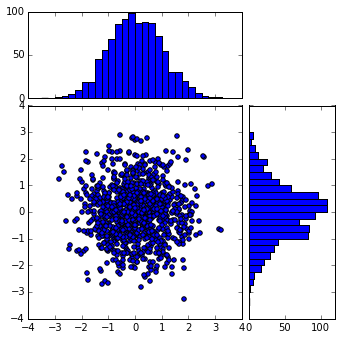

In [17]:
# http://matplotlib.org/examples/axes_grid/scatter_hist.html
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)


fig, axScatter = plt.subplots(figsize=(5.5,5.5))

# the scatter plot:
axScatter.scatter(x, y)
axScatter.set_aspect(1.)

# create new axes on the right and on the top of the current axes
# The first argument of the new_vertical(new_horizontal) method is
# the height (width) of the axes to be created in inches.
divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axScatter)
axHisty = divider.append_axes("right", 1.2, pad=0.1, sharey=axScatter)

# make some labels invisible
plt.setp(axHistx.get_xticklabels() + axHisty.get_yticklabels(),
         visible=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max( [np.max(np.fabs(x)), np.max(np.fabs(y))] )
lim = ( int(xymax/binwidth) + 1) * binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

# the xaxis of axHistx and yaxis of axHisty are shared with axScatter,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

#axHistx.axis["bottom"].major_ticklabels.set_visible(False)
for tl in axHistx.get_xticklabels():
    tl.set_visible(False)
axHistx.set_yticks([0, 50, 100])

#axHisty.axis["left"].major_ticklabels.set_visible(False)
for tl in axHisty.get_yticklabels():
    tl.set_visible(False)
axHisty.set_xticks([0, 50, 100])

plt.draw()
plt.show()

In [ ]:
# http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/


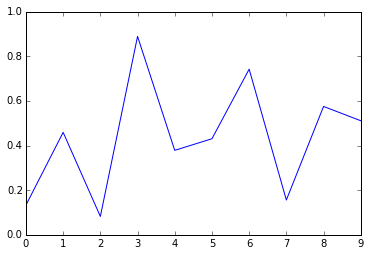

In [26]:
# http://matplotlib.org/examples/animation/random_data.html
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)

def update(data):
    line.set_ydata(data)
    return line,

def data_gen():
    while True: yield np.random.rand(10)

ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

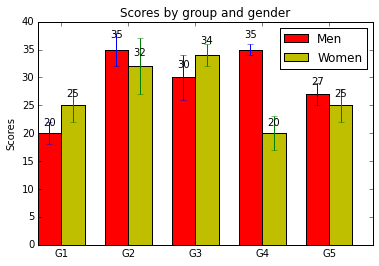

In [27]:
# http://matplotlib.org/examples/api/barchart_demo.html
#!/usr/bin/env python
# a bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [31]:
import sqlalchemy

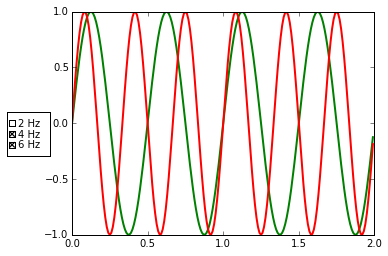

In [32]:
# http://matplotlib.org/examples/widgets/check_buttons.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2)
l1, = ax.plot(t, s1, lw=2)
l2, = ax.plot(t, s2, lw=2)
plt.subplots_adjust(left=0.2)

rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, ('2 Hz', '4 Hz', '6 Hz'), (False, True, True))

def func(label):
    if label == '2 Hz': l0.set_visible(not l0.get_visible())
    elif label == '4 Hz': l1.set_visible(not l1.get_visible())
    elif label == '6 Hz': l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

In [38]:
import sys
sys.path

['',
 'C:\\Anaconda3\\python34.zip',
 'C:\\Anaconda3\\DLLs',
 'C:\\Anaconda3\\lib',
 'C:\\Anaconda3',
 'c:\\anaconda3\\lib\\site-packages\\sphinx-1.3.1-py3.4.egg',
 'c:\\anaconda3\\lib\\site-packages\\setuptools-18.3.2-py3.4.egg',
 'C:\\Anaconda3\\lib\\site-packages',
 'C:\\Anaconda3\\lib\\site-packages\\cryptography-0.9.1-py3.4-win-amd64.egg',
 'C:\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions']

In [39]:
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [40]:
%logstart


Activating auto-logging. Current session state plus future input saved.
Filename       : ipython_log.py
Mode           : rotate
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [ ]:
!dir


In [ ]:
print(%pwd)

In [1]:
# see McKinney p. 139
import pandas.io.data as web
from pandas import Series, DataFrame
import pandas as pd

all_data = {}
for ticker in ['AAPL','IBM','MSFT','GOOG']:
    all_data[ticker] = web.get_data_yahoo(ticker,'1/1/2000','10/12/2015')
    
price = DataFrame({tic: data['Adj Close']
                   for tic, data in all_data.items()})
volume = DataFrame({tic: data['Volume']
                   for tic, data in all_data.items()})

/Users/sterlingbusinessadvantage/anaconda/lib/python3.5/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
returns = price.pct_change()
returns.tail()




,AAPL,GOOG,IBM,MSFT
Date,,,,
2015-10-06,0.004784,0.006189,-0.001744,0.002573
2015-10-07,-0.004761,-0.004772,0.008805,0.001069
2015-10-08,-0.011554,-0.004982,0.014591,0.013889
2015-10-09,0.023927,0.006962,0.000722,-0.007165
2015-10-12,-0.004638,0.004754,-0.008203,-0.002335


In [4]:
print(bool(0))

False


In [5]:
for count in range(0,10):
    print(bool(count))

False
True
True
True
True
True
True
True
True
True


In [6]:
count = 0
while count < 10:
    count += 1
    print("The value of count is " + str(count) + " so the condition is " + str(bool(count < 10)))
    if not bool(count < 10):
        print("so the loop now exits")



The value of count is 1 so the condition is True
The value of count is 2 so the condition is True
The value of count is 3 so the condition is True
The value of count is 4 so the condition is True
The value of count is 5 so the condition is True
The value of count is 6 so the condition is True
The value of count is 7 so the condition is True
The value of count is 8 so the condition is True
The value of count is 9 so the condition is True
The value of count is 10 so the condition is False
so the loop now exits


In [7]:
bool('')

False

In [8]:
'''
A string is a sequence of zero or more characters. 

The len function returns the number of characters in its string argument. 
Each character occupies a position in the string. 
The positions range from 0 to the length of the string minus 1.
A string is immutable. This means it does not change once it is created.

The subscript operator [] can be used to access a character at a given position in a string.
The operand or index inside the subscript operator can be used to access a character at a given position 
in a string. The operand or index inside the subscript operator must be an integer expression whose value
is less than the string's length.

A subscript operator can also be used for slicing - to fetch a substring from a string.
Use the subscript operator as myString[3:5]


'''
s = "This is my string"
i = 0
numberSpaces = 0
print(len(s))
#print(s[16])
print("Printing the subscript from 5 to 10: " + s[5:10])

for eachCharacter in range(len(s)-1,-1,-1):
    print(s[eachCharacter],end="")
    if s[eachCharacter]==" ":
        numberSpaces += 1
    if s[eachCharacter].lower() == 'i':
        i +=1
        
print("\n")
print("There are " + str(i) + " i's in the string")
print("There are " + str(numberSpaces) + " spaces.")





    


17
Printing the subscript from 5 to 10: is my
gnirts ym si sihT

There are 3 i's in the string
There are 3 spaces.


In [33]:
while True:
    answer = input("Enter a movie you like or press 'q' to quit: ")
    if answer.lower() == 'q':
        break
    else:
        print("You entered " + answer)

print("You will now exit the program.")



Enter a movie you like or press 'q' to quit: dfssf
You entered dfssf
Enter a movie you like or press 'q' to quit: fdsa
You entered fdsa
Enter a movie you like or press 'q' to quit: afds
You entered afds
Enter a movie you like or press 'q' to quit: afds
You entered afds
Enter a movie you like or press 'q' to quit: afd
You entered afd
Enter a movie you like or press 'q' to quit: q
You will now exit the program.


In [34]:
#Your next assignment is to append all your answers to a variable named history and show history after the user quits
history = ""
while True:
    answer = input("Enter a movie you like or press 'q' to quit: ")
    if answer.lower() == 'q':
        break
    else:
        history += "\n" + answer
        #print("You entered " + answer)

print("You will now exit the program.")
print(history)

#Your next assignment is to add a counter to the movies


Enter a movie you like or press 'q' to quit: sdjkl
Enter a movie you like or press 'q' to quit: sdjl
Enter a movie you like or press 'q' to quit: ajsdklj
Enter a movie you like or press 'q' to quit: jdsklf
Enter a movie you like or press 'q' to quit: q
You will now exit the program.

sdjkl
sdjl
ajsdklj
jdsklf


In [1]:
# Instructor Notes
# discuss lambda
# discuss anaconda and show spyder
# fill in the gaps now that they have created examples give them the information behind it.
# explain dataframe and series in more detail
# Discuss pivot tables for next example  http://pbpython.com/pandas-pivot-table-explained.html
# discuss iPython notebook and pandas in more detail - see page 46 : iPython basics
# http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
# baby names example from book p. 32...

In [55]:
# from the command prompt type: conda install pyodbc
# you can also run conda update and conda update anaconda
# https://code.google.com/p/pyodbc/wiki/GettingStarted
# download northwind.mdb and create a DSN named 'Northwind' in windows from the control panel
# from Win7 64 bit you can run c:\Windows\SysWOW64\odbcad32.exe. 
# See http://superuser.com/questions/419832/how-can-i-open-the-32-bit-odbc-data-source-administrator-in-windows-7-64-bit

import pyodbc
import sqlalchemy
# Parameters:
ServerName = "Northwind"
dbname = r"Northwind.mdb"
tblName = "employees"
#create the connection
engine = create_engine('mssql+pyodbc://'+ ServerName + '/' + dbName)
conn = engine.connect

# Required for querying tables
metadata = MetaData(conn)

tbl = Table(tblName, metadata, autoload=True, schema="dbo")
#tbl.create(checkfirst=True)

sql = tbl.select()

result = conn.execute(sql)

df = pd.DataFrame(data=list(result), columns=result.keys())

conn.close()

df.head()




    
# https://code.google.com/p/pyodbc/wiki/Cursor    

NameError: name 'create_engine' is not defined

In [ ]:


import pyodbc
import pandas as pd
import pandas.io.sql as sql # Gives us access to the read_sql method to read our database into a dataframe

# option 1:
# you can create a cursor and fill that from the connection.execute method. 
# This returns a list of tuples representing your data which you can pass to a DataFrame
cursor = conn.cursor()

# I rename the fields to get rid of the spaces
cursor.execute(r"select [First Name] as FName, [Last Name] as LName from employees")
rows = cursor.fetchall()

columnOrdinal = 0
for row in rows:
    print(row.FName + ' ' + row.LName)

# To display all the rows uncomment the following line
#print(rows)

#to pass the list of tuples representing your data to a DataFrame:
#df = pd.DataFrame(rows, columns=list(zip('FName','LName'))

In [2]:
-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 18 columns):
ID                 9 non-null int64
Company            9 non-null object
Last Name          9 non-null object
First Name         9 non-null object
E-mail Address     9 non-null object
Job Title          9 non-null object
Business Phone     9 non-null object
Home Phone         9 non-null object
Mobile Phone       0 non-null object
Fax Number         9 non-null object
Address            9 non-null object
City               9 non-null object
State/Province     9 non-null object
ZIP/Postal Code    9 non-null object
Country/Region     9 non-null object
Web Page           9 non-null object
Notes              6 non-null object
Attachments        9 non-null object
dtypes: int64(1), object(17)
memory usage: 1.3+ KB


,ID,Company,Last Name,First Name,E-mail Address,Job Title,Business Phone,Home Phone,Mobile Phone,Fax Number,Address,City,State/Province,ZIP/Postal Code,Country/Region,Web Page,Notes,Attachments
0,1,Northwind Traders,Freehafer,Nancy,nancy@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 1st Avenue,Seattle,WA,99999,USA,#http://northwindtraders.com#,None,
1,2,Northwind Traders,Cencini,Andrew,andrew@northwindtraders.com,"Vice President, Sales",(123)555-0100,(123)555-0102,None,(123)555-0103,123 2nd Avenue,Bellevue,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,"Joined the company as a sales representative, ...",
2,3,Northwind Traders,Kotas,Jan,jan@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 3rd Avenue,Redmond,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,Was hired as a sales associate and was promote...,
3,4,Northwind Traders,Sergienko,Mariya,mariya@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 4th Avenue,Kirkland,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,None,
4,5,Northwind Traders,Thorpe,Steven,steven@northwindtraders.com,Sales Manager,(123)555-0100,(123)555-0102,None,(123)555-0103,123 5th Avenue,Seattle,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,Joined the company as a sales representative a...,
5,6,Northwind Traders,Neipper,Michael,michael@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 6th Avenue,Redmond,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,Fluent in Japanese and can read and write Fren...,
6,7,Northwind Traders,Zare,Robert,robert@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 7th Avenue,Seattle,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,None,
7,8,Northwind Traders,Giussani,Laura,laura@northwindtraders.com,Sales Coordinator,(123)555-0100,(123)555-0102,None,(123)555-0103,123 8th Avenue,Redmond,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,Reads and writes French.,
8,9,Northwind Traders,Hellung-Larsen,Anne,anne@northwindtraders.com,Sales Representative,(123)555-0100,(123)555-0102,None,(123)555-0103,123 9th Avenue,Seattle,WA,99999,USA,http://northwindtraders.com#http://northwindtr...,Fluent in French and German.,


###SQLite

SQLite is an in-process library that implements a self-contained, serverless, zero-configuration, transactional SQL database engine. The code for SQLite is in the public domain and is thus free for use for any purpose, commercial or private. SQLite is the most widely deployed database in the world with more applications than we can count, including several high-profile projects.

SQLite is an embedded SQL database engine. Unlike most other SQL databases, SQLite does not have a separate server process. SQLite reads and writes directly to ordinary disk files. A complete SQL database with multiple tables, indices, triggers, and views, is contained in a single disk file. The database file format is cross-platform - you can freely copy a database between 32-bit and 64-bit systems or between big-endian and little-endian architectures. These features make SQLite a popular choice as an Application File Format. Think of SQLite not as a replacement for Oracle but as a replacement for fopen()

Because SQLite uses a very generic type system, we don't get the strict data types that we would in most other databases (such as MySQL and PostgreSQL); therefore, all of our data is going to be stored as text. In other databases, we'd store dates as a date or datetime field but in SQLite it's text.

http://www.thegeekstuff.com/2012/09/sqlite-command-examples/

In [44]:
import pandas as pd
import sqlite3

# Create a SQL connection to our SQLite database
#con = sqlite3.connect(r'C:\Users\Sterling7\Dropbox\dave45678\Python for Data Analytics\sqlite3\Chinook_Sqlite.sqlite')
con = sqlite3.connect(r'C:\Users\Sterling7\Dropbox\dave45678\Python for Data Analytics\sqlite3\movielens')
cur = con.cursor()

# the result of a "cursor.execute" can be iterated over by row
for row in cur.execute('SELECT * FROM Movies;'):
    print(row)



(1, 'Toy Story (1995)', '1995-01-01')
(2, 'GoldenEye (1995)', '1995-01-01')
(3, 'Four Rooms (1995)', '1995-01-01')
(4, 'Get Shorty (1995)', '1995-01-01')
(5, 'Copycat (1995)', '1995-01-01')
(6, 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', '1995-01-01')
(7, 'Twelve Monkeys (1995)', '1995-01-01')
(8, 'Babe (1995)', '1995-01-01')
(9, 'Dead Man Walking (1995)', '1995-01-01')
(10, 'Richard III (1995)', '1996-01-22')
(11, 'Seven (Se7en) (1995)', '1995-01-01')
(12, 'Usual Suspects, The (1995)', '1995-08-14')
(13, 'Mighty Aphrodite (1995)', '1995-10-30')
(14, 'Postino, Il (1994)', '1994-01-01')
(15, "Mr. Holland's Opus (1995)", '1996-01-29')
(16, 'French Twist (Gazon maudit) (1995)', '1995-01-01')
(17, 'From Dusk Till Dawn (1996)', '1996-02-05')
(18, 'White Balloon, The (1995)', '1995-01-01')
(19, "Antonia's Line (1995)", '1995-01-01')
(20, 'Angels and Insects (1995)', '1995-01-01')
(21, 'Muppet Treasure Island (1996)', '1996-02-16')
(22, 'Braveheart (1995)', '1996-02-16')
(23, 'Tax

In [45]:
df_movies = pd.read_sql_query("SELECT * from Movies;", con)

# verify that result of SQL query is stored in the dataframe
print(df_movies.head())

#Be sure to close the connection.
con.close()

   id              title release_date
0   1   Toy Story (1995)   1995-01-01
1   2   GoldenEye (1995)   1995-01-01
2   3  Four Rooms (1995)   1995-01-01
3   4  Get Shorty (1995)   1995-01-01
4   5     Copycat (1995)   1995-01-01


In [46]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 0 to 1681
Data columns (total 3 columns):
id              1682 non-null int64
title           1682 non-null object
release_date    1681 non-null object
dtypes: int64(1), object(2)
memory usage: 52.6+ KB


### The output tells a few things about our DataFrame.
* Each row was assigned an index of 0 to N-1, where N is the number of rows in the DataFrame. pandas will do this by default if an index is not specified. Don't worry, this can be changed later.
* There are 1,682 rows (every row must have an index).
* Our dataset has five total columns, one of which isn't populated at all (video_release_date) and two that are missing some values (release_date and imdb_url).
* The last line displays the datatypes of each column, but not necessarily in the corresponding order to the listed columns. 

You should use the dtypes method to get the datatype for each column.

In [50]:
df_movies.dtypes

id               int64
title           object
release_date    object
dtype: object

###Benchmarking our results
http://sebastianraschka.com/Articles/sqlite3_database.html#benchmarks

Where clause examples
towed[towed["state"] == "TX"] # all columns and records where the car was from TX

towed[(towed["state"] == "TX") & (towed["make"] == "KIA")] # made by KIA AND from TX

towed[(towed["state"] == "MA") | (towed["make"] == "JAGU")] # made by Jaguar OR from MA

towed[towed["make"] == "KIA"].sort("color") # made by KIA, ordered by color (A to Z)

##Hosted solution for your ipython notebooks

https://plot.ly/ipython-notebooks/#

In [42]:
import pandas as pd
import numpy as np

data = {'State':['MD','MD','MD','DC','DC','DC','VA'],'Score':[89,76,78,67,87,69,85],'County':['a','b','c','dc','dc','dc','d']}
frame=pd.DataFrame(data)
print(frame)
sortedframe = frame.sort(['State','County'], ascending=True).groupby(['State']).mean()
print(sortedframe)

  County  Score State
0      a     89    MD
1      b     76    MD
2      c     78    MD
3     dc     67    DC
4     dc     87    DC
5     dc     69    DC
6      d     85    VA
           Score
State           
DC     74.333333
MD     81.000000
VA     85.000000


In [4]:
import json, requests, pprint

url = 'http://maps.googleapis.com/maps/api/geocode/json?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&sensor=false'

params = dict(
    origin='Chicago,IL',
    destination='Los+Angeles,CA',
    waypoints='Joplin,MO|Oklahoma+City,OK',
    sensor='false'
)


data = requests.get(url=url, params=params)
binary = data.content
output = json.loads(binary)

# test to see if the request was valid
#print output['status']

# output all of the results
#pprint.pprint(output)



TypeError: the JSON object must be str, not 'bytes'

In [63]:
# retrieve a list of customers from a web-service
# What is a web service?
# What is JSON? http://www.w3schools.com/json/default.asp
import urllib.request

#from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize

#url = 'http://www.w3schools.com/website/customers_mysql.php'
url = 'http://data.colorado.gov/resource/4ykn-tg5h.json' #http://themarklee.com/2014/04/03/pulling-json-data-open-data-api/
url = 'http://api.zippopotam.us/us/21532' #http://www.zippopotam.us/
request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
# print (response.read().decode('utf-8'))

df = pd.read_json(url)

df



,country,country abbreviation,places,post code
0,United States,US,"{'place name': 'Frostburg', 'state': 'Maryland...",21532


In [56]:
# Discuss GroupBY in detail
# http://wesmckinney.com/blog/groupby-fu-improvements-in-grouping-and-aggregating-data-in-pandas/
df = pd.DataFrame({'labels':["a","a","b","b"],
'value':[10,20,30,40]
})

group = df.groupby('labels')[value.sum]
df['value.sum'] = group.transform('sum')
group

NameError: name 'value' is not defined

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#import seaborn as sns
y = np.randn(100)
plot(y)
autoscale(tight='x')
tight_layout()

AttributeError: 'module' object has no attribute 'randn'

you can automatically write code in an IPython notebook cell into a python script by adding the following line at the top of the cell

%%writefile script_name.py

Another option is when you run "ipython notebook" in the Bash shell, you can type "ipython notebook --script" which will also automatically save anything you do to a script.